In [2]:
import os
from collections import Counter
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import icd
from sklearn.preprocessing import scale

In [3]:
# Reading the Auth file
os.getcwd()
os.chdir('C:\\Users\\pdubhasi\\Documents\\UHG\\Rx prior Auth')

Rx=pd.read_excel('Rx_Prior_Auth_Data.xlsx',sheet_name= 'Rx_Prior_Auth_Data',dtype=str)
Rx.replace('(null)', np.nan, inplace=True)

In [4]:
numeric = ['DRUG_STRENGTH', 'DRUG_PACKAGE_SIZE', 'DRUG_PACKAGE_QTY', 'TOTAL_DRUG_PACKAGE_QTY']
cat = ['PRIOR_AUTH_TYPE', 'STATUS', 'AUTO_DENIED_FLAG', 'DRUG_LABEL_NAME',
       'CARRIER_ID','ACCOUNT_ID','EMPLOYER_GROUP_ID','GENDER_CODE','STATE_CODE',
       'PLAN_CODE','BRAND_NAME','HIGH_PRIORITY_FLAG','FORMULARY_STATUS',
       'DRUG_STATUS_CODE','DRUG_MANUFACTURER_NAME','DRUG_UOM']
Rx[numeric] = Rx[numeric].astype(float)
Rx[cat] = Rx[cat].astype('category')
Rx.dtypes

PRIOR_AUTH_NUM              object
PRIOR_AUTH_TYPE           category
STATUS                    category
AUTO_DENIED_FLAG          category
PA_CREATED_DATE             object
PA_CREATED_DATE_ONLY        object
DATE_OF_BIRTH               object
DRUG_LABEL_NAME           category
CARRIER_ID                category
ACCOUNT_ID                category
EMPLOYER_GROUP_ID         category
GENDER_CODE               category
STATE_CODE                category
DIRECTIONS_FOR_USE          object
DIAGNOSIS_COMMENTS          object
PLAN_CODE                 category
BRAND_NAME                category
HIGH_PRIORITY_FLAG        category
FORMULARY_STATUS          category
ICD_CODE                    object
ICD_DESCRIPTION             object
DRUG_STATUS_CODE          category
DRUG_STRENGTH              float64
DRUG_MANUFACTURER_NAME    category
DRUG_UOM                  category
DRUG_PACKAGE_SIZE          float64
DRUG_PACKAGE_QTY           float64
TOTAL_DRUG_PACKAGE_QTY     float64
dtype: object

In [5]:
# Reading PA data into dataframe
display(Rx.sample(5))
print('\nUNIQUE:\n\n', Rx.nunique())
print('\nMISSING:\n\n', Rx.isna().mean()*100)
print('\nDTYPES:\n\n', Rx.dtypes)

,PRIOR_AUTH_NUM,PRIOR_AUTH_TYPE,STATUS,AUTO_DENIED_FLAG,PA_CREATED_DATE,PA_CREATED_DATE_ONLY,DATE_OF_BIRTH,DRUG_LABEL_NAME,CARRIER_ID,ACCOUNT_ID,...,FORMULARY_STATUS,ICD_CODE,ICD_DESCRIPTION,DRUG_STATUS_CODE,DRUG_STRENGTH,DRUG_MANUFACTURER_NAME,DRUG_UOM,DRUG_PACKAGE_SIZE,DRUG_PACKAGE_QTY,TOTAL_DRUG_PACKAGE_QTY
359766,PA-33353769,PAReqd,RESOLVED-DENIED,N,2017-03-22-11.55.39,2017-03-22 00:00:00,1999-01-18 00:00:00,FINASTERIDE TAB 1MG,UHCPRIM01,F,...,Y,L65.9,L65.9-NONSCARRING HAIR LOSS UNSPECIFIED,A,1.0,AUROBINDO,MG,30.0,1.0,30.0
224805,PA-33172201,QntyLimit,RESOLVED-APPROVED,N,2017-03-15-17.52.10,2017-03-15 00:00:00,1956-08-20 00:00:00,SYMBICORT AER 160-4.5,UHCACIS01,F,...,Y,0,000-hypoxia,A,0.0,ASTZEN LP,NaN,10.2,1.0,10.2
221947,PA-33132937,StepTherapy,RESOLVED-APPROVED,N,2017-03-15-07.49.16,2017-03-15 00:00:00,1957-03-07 00:00:00,TRINTELLIX TAB 5MG,UHCACIS01,F,...,Y,0,000-DEPRESSION,A,5.0,TAKEDA,MG,30.0,1.0,30.0
161143,PA-32905085,PAReqd,RESOLVED-DENIED,Y,2017-03-07-15.17.38,2017-03-07 00:00:00,1960-08-31 00:00:00,ZETIA TAB 10MG,UHCACIS01,F,...,Y,NaN,NaN,A,10.0,MERCK/SCHE,MG,30.0,1.0,30.0
57146,PA-32737735,PAReqd,RESOLVED-APPROVED,N,2017-03-02-10.31.28,2017-03-02 00:00:00,1985-10-28 00:00:00,DICLOFENAC TAB 75MG DR,ACUOH,ACUOHWA3,...,Y,S60.212D,S60.212D-CONTUSION OF LEFT WRIST SUBSEQUENT EN...,A,75.0,CARLSBAD,MG,500.0,1.0,500.0



UNIQUE:

 PRIOR_AUTH_NUM            564817
PRIOR_AUTH_TYPE               23
STATUS                         3
AUTO_DENIED_FLAG               2
PA_CREATED_DATE           421917
PA_CREATED_DATE_ONLY          31
DATE_OF_BIRTH              34702
DRUG_LABEL_NAME             7432
CARRIER_ID                   778
ACCOUNT_ID                  4210
EMPLOYER_GROUP_ID          43966
GENDER_CODE                    2
STATE_CODE                    60
DIRECTIONS_FOR_USE        155583
DIAGNOSIS_COMMENTS         86259
PLAN_CODE                  20138
BRAND_NAME                  4341
HIGH_PRIORITY_FLAG             2
FORMULARY_STATUS               2
ICD_CODE                   49234
ICD_DESCRIPTION            86259
DRUG_STATUS_CODE               2
DRUG_STRENGTH                309
DRUG_MANUFACTURER_NAME       784
DRUG_UOM                     149
DRUG_PACKAGE_SIZE            283
DRUG_PACKAGE_QTY              35
TOTAL_DRUG_PACKAGE_QTY       341
dtype: int64

MISSING:

 PRIOR_AUTH_NUM             0.000000
PRIO

1. Data is limited to March 2017 month alone.
2. Date field has 7.58% of NA values and 3.13% of future dates.
3. PRIOR_AUTH_TYPE has 0.002% of nulls - Safe to remove them from dataset.
4. As we need to consider only RESOLVED-APPROVED and RESOLVED-DENIED records deleting the RESOLVED-OVERTURNED records in STATUS from the dataset.

Where ever the DATE_OF_BIRTH COLUMN is null the GENDER_CODE & STATE_CODE are also null so removing them from df.
Also TOTAL_DRUG_PACKAGE_QTY is direct multiplication of DRUG_PACKAGE_SIZE	and DRUG_PACKAGE_QTY removing them from the dataset.

In [63]:
Rx1 = Rx[Rx.duplicated()==False]
Rx1.dropna(axis=0,subset=['PRIOR_AUTH_TYPE','DATE_OF_BIRTH'],inplace=True)
Rx1.drop(['DRUG_PACKAGE_SIZE','DRUG_PACKAGE_QTY'],axis=1,inplace=True)
Rx1.drop(Rx1[Rx1['STATUS']=='RESOLVED-OVERTURNED'].index,axis=0,inplace=True)
print(Rx1.isna().mean()*100)

C:\Users\pdubhasi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pdubhasi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


PRIOR_AUTH_NUM             0.000000
PRIOR_AUTH_TYPE            0.000000
STATUS                     0.000000
AUTO_DENIED_FLAG           0.000000
PA_CREATED_DATE            0.000000
PA_CREATED_DATE_ONLY       0.000000
DATE_OF_BIRTH              0.000000
DRUG_LABEL_NAME            0.000000
CARRIER_ID                 0.000000
ACCOUNT_ID                 0.000000
EMPLOYER_GROUP_ID          0.008576
GENDER_CODE                0.000204
STATE_CODE                 0.032669
DIRECTIONS_FOR_USE        10.464675
DIAGNOSIS_COMMENTS        11.410849
PLAN_CODE                  0.000000
BRAND_NAME                 0.000000
HIGH_PRIORITY_FLAG         0.000000
FORMULARY_STATUS           6.083363
ICD_CODE                  11.410849
ICD_DESCRIPTION           11.410849
DRUG_STATUS_CODE           1.201604
DRUG_STRENGTH              0.000000
DRUG_MANUFACTURER_NAME     0.929431
DRUG_UOM                  16.058412
TOTAL_DRUG_PACKAGE_QTY     0.000000
dtype: float64


In [64]:
print(Rx1.AUTO_DENIED_FLAG.value_counts())
print()
print(Rx1.STATUS.value_counts())
print()
print(Rx1.groupby(['STATUS','AUTO_DENIED_FLAG']).size())

N    459671
Y     30091
Name: AUTO_DENIED_FLAG, dtype: int64

RESOLVED-APPROVED      292108
RESOLVED-DENIED        197654
RESOLVED-OVERTURNED         0
Name: STATUS, dtype: int64

STATUS             AUTO_DENIED_FLAG
RESOLVED-APPROVED  N                   281037
                   Y                    11071
RESOLVED-DENIED    N                   178634
                   Y                    19020
dtype: int64


Driving the Age variable from the DATE_OF_BIRTH and PA_CREATED_DATE_ONLY.

C:\Users\pdubhasi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pdubhasi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



DTYPES:

 PRIOR_AUTH_NUM                    object
PRIOR_AUTH_TYPE                 category
STATUS                          category
AUTO_DENIED_FLAG                category
PA_CREATED_DATE                   object
PA_CREATED_DATE_ONLY      datetime64[ns]
DATE_OF_BIRTH             datetime64[ns]
DRUG_LABEL_NAME                 category
CARRIER_ID                      category
ACCOUNT_ID                      category
EMPLOYER_GROUP_ID               category
GENDER_CODE                     category
STATE_CODE                      category
DIRECTIONS_FOR_USE                object
DIAGNOSIS_COMMENTS                object
PLAN_CODE                       category
BRAND_NAME                      category
HIGH_PRIORITY_FLAG              category
FORMULARY_STATUS                category
ICD_CODE                          object
ICD_DESCRIPTION                   object
DRUG_STATUS_CODE                category
DRUG_STRENGTH                    float64
DRUG_MANUFACTURER_NAME          category
DRUG_

C:\Users\pdubhasi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


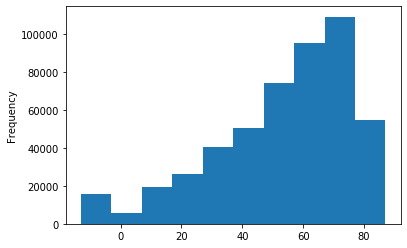

In [65]:
Rx1['DATE_OF_BIRTH']=pd.to_datetime(Rx1['DATE_OF_BIRTH'])
Rx1['PA_CREATED_DATE_ONLY']=pd.to_datetime(Rx1['PA_CREATED_DATE_ONLY'])
print('\nDTYPES:\n\n', Rx1.dtypes)
Rx1['Age']= np.floor((Rx1['PA_CREATED_DATE_ONLY']-Rx1['DATE_OF_BIRTH']).dt.days/365.25)
Rx1.Age.plot.hist()

Age has some negative values due to future dates. Lets look into the distribution of output variable for these values.

In [66]:
Rx1[Rx1.Age<0].STATUS.value_counts()

RESOLVED-APPROVED      10446
RESOLVED-DENIED         5585
RESOLVED-OVERTURNED        0
Name: STATUS, dtype: int64

Samples with negative age are around 11000 records and 50% of these claims were DENIED so replacing the negatives with mean values to keep the ditribution same.

C:\Users\pdubhasi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


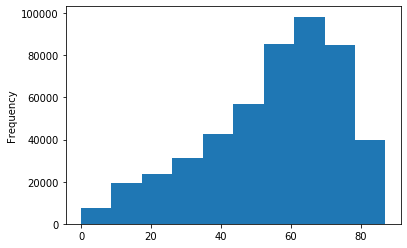

In [67]:
Rx1.loc[Rx1['Age']< 0, 'Age'] = Rx1['Age'].mean()
Rx1.Age.plot.hist()

In [68]:
Rx1.Age.describe()

count    489762.000000
mean         54.969288
std          19.279159
min           0.000000
25%          43.000000
50%          58.000000
75%          70.000000
max          87.000000
Name: Age, dtype: float64

1. Tried log transform and squareroot transform to descrease the skweness of the describution but it is increasing it.
2. Since Age variable is derived removing PA_CREATED_DATE_ONLY, PA_CREATED_DATE and DATE_OF_BIRTH columns.

In [69]:
Rx1.drop(['PA_CREATED_DATE_ONLY','PA_CREATED_DATE','DATE_OF_BIRTH'],axis=1,inplace=True)
print(Rx1.isna().mean()*100)

PRIOR_AUTH_NUM             0.000000
PRIOR_AUTH_TYPE            0.000000
STATUS                     0.000000
AUTO_DENIED_FLAG           0.000000
DRUG_LABEL_NAME            0.000000
CARRIER_ID                 0.000000
ACCOUNT_ID                 0.000000
EMPLOYER_GROUP_ID          0.008576
GENDER_CODE                0.000204
STATE_CODE                 0.032669
DIRECTIONS_FOR_USE        10.464675
DIAGNOSIS_COMMENTS        11.410849
PLAN_CODE                  0.000000
BRAND_NAME                 0.000000
HIGH_PRIORITY_FLAG         0.000000
FORMULARY_STATUS           6.083363
ICD_CODE                  11.410849
ICD_DESCRIPTION           11.410849
DRUG_STATUS_CODE           1.201604
DRUG_STRENGTH              0.000000
DRUG_MANUFACTURER_NAME     0.929431
DRUG_UOM                  16.058412
TOTAL_DRUG_PACKAGE_QTY     0.000000
Age                        0.000000
dtype: float64


1. Since GENDER_CODE, EMPLOYER_GROUP_ID has very less percentage of nulls dropping those records.
2. STATE_CODE has invalide values like 'XX','ON','FS','NB','AE' mapping them to NA category along with the nulls.

In [70]:
Rx1.dropna(axis=0,subset=['GENDER_CODE','EMPLOYER_GROUP_ID'],inplace=True)
Rx1['STATE_CODE'] = Rx1['STATE_CODE'].cat.add_categories(['NA']);
Rx1.loc[Rx1['STATE_CODE'].isin(['XX','ON','FS','NB','AE']), 'STATE_CODE'] = 'NA'
Rx1['STATE_CODE'].fillna('NA',inplace=True)
print(Rx1.isna().mean()*100)

C:\Users\pdubhasi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pdubhasi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pdubhasi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

PRIOR_AUTH_NUM             0.000000
PRIOR_AUTH_TYPE            0.000000
STATUS                     0.000000
AUTO_DENIED_FLAG           0.000000
DRUG_LABEL_NAME            0.000000
CARRIER_ID                 0.000000
ACCOUNT_ID                 0.000000
EMPLOYER_GROUP_ID          0.000000
GENDER_CODE                0.000000
STATE_CODE                 0.000000
DIRECTIONS_FOR_USE        10.463143
DIAGNOSIS_COMMENTS        11.410625
PLAN_CODE                  0.000000
BRAND_NAME                 0.000000
HIGH_PRIORITY_FLAG         0.000000
FORMULARY_STATUS           6.083284
ICD_CODE                  11.410625
ICD_DESCRIPTION           11.410625
DRUG_STATUS_CODE           1.201710
DRUG_STRENGTH              0.000000
DRUG_MANUFACTURER_NAME     0.929513
DRUG_UOM                  16.057576
TOTAL_DRUG_PACKAGE_QTY     0.000000
Age                        0.000000
dtype: float64


In [71]:
Rx1.loc[Rx1['DIRECTIONS_FOR_USE'].isin(['.','..','...']), 'DIRECTIONS_FOR_USE'] = None
Rx1.loc[Rx1['DIAGNOSIS_COMMENTS'].isin(['**-','***-','****-','.-','..-','.-.','..-..','...-..','......-','0-']), 'DIAGNOSIS_COMMENTS'] = None
print(Rx1.isna().mean()*100)

PRIOR_AUTH_NUM             0.000000
PRIOR_AUTH_TYPE            0.000000
STATUS                     0.000000
AUTO_DENIED_FLAG           0.000000
DRUG_LABEL_NAME            0.000000
CARRIER_ID                 0.000000
ACCOUNT_ID                 0.000000
EMPLOYER_GROUP_ID          0.000000
GENDER_CODE                0.000000
STATE_CODE                 0.000000
DIRECTIONS_FOR_USE        11.474948
DIAGNOSIS_COMMENTS        11.424307
PLAN_CODE                  0.000000
BRAND_NAME                 0.000000
HIGH_PRIORITY_FLAG         0.000000
FORMULARY_STATUS           6.083284
ICD_CODE                  11.410625
ICD_DESCRIPTION           11.410625
DRUG_STATUS_CODE           1.201710
DRUG_STRENGTH              0.000000
DRUG_MANUFACTURER_NAME     0.929513
DRUG_UOM                  16.057576
TOTAL_DRUG_PACKAGE_QTY     0.000000
Age                        0.000000
dtype: float64


In [72]:
display(Rx1[Rx1['DIRECTIONS_FOR_USE'].isna()].groupby(['STATUS']).size())
display(Rx1[Rx1['DIAGNOSIS_COMMENTS'].isna()].groupby(['STATUS']).size())
display(Rx1[Rx1['ICD_CODE'].isna()].groupby(['STATUS']).size())
display(Rx1[Rx1['ICD_DESCRIPTION'].isna()].groupby(['STATUS']).size())

STATUS
RESOLVED-APPROVED      47521
RESOLVED-DENIED         8674
RESOLVED-OVERTURNED        0
dtype: int64

STATUS
RESOLVED-APPROVED      45262
RESOLVED-DENIED        10685
RESOLVED-OVERTURNED        0
dtype: int64

STATUS
RESOLVED-APPROVED      45220
RESOLVED-DENIED        10660
RESOLVED-OVERTURNED        0
dtype: int64

STATUS
RESOLVED-APPROVED      45220
RESOLVED-DENIED        10660
RESOLVED-OVERTURNED        0
dtype: int64

1. There is 20% chances that AURO_DENIED_FLAG is 'Y' when DIRECTION_FOR_USE is kept as NULLS. So replacing the NULLS with NOT PROVIDED category.
2. When DIAGNOSIS_COMMENTS is null then there are 8% chances that claim is getting auto denied. when DIAGNOSIS_COMMENTS are null then mostly ICD_CODE,ICD_DESCRIPTION are also nulls. So replacing the DIAGNOSIS_COMMENTS and ICD_DESCRIPTION to NOT PROVIDED category.
3. ICD_CODE will be processed seperately to get more sense.

In [73]:
Rx1['DIRECTIONS_FOR_USE'].fillna("NOT PROVIDED",inplace=True)
Rx1['DIAGNOSIS_COMMENTS'].fillna("NOT PROVIDED",inplace=True)
Rx1['ICD_DESCRIPTION'].fillna("NOT PROVIDED",inplace=True)
print(Rx1.isna().mean()*100)

PRIOR_AUTH_NUM             0.000000
PRIOR_AUTH_TYPE            0.000000
STATUS                     0.000000
AUTO_DENIED_FLAG           0.000000
DRUG_LABEL_NAME            0.000000
CARRIER_ID                 0.000000
ACCOUNT_ID                 0.000000
EMPLOYER_GROUP_ID          0.000000
GENDER_CODE                0.000000
STATE_CODE                 0.000000
DIRECTIONS_FOR_USE         0.000000
DIAGNOSIS_COMMENTS         0.000000
PLAN_CODE                  0.000000
BRAND_NAME                 0.000000
HIGH_PRIORITY_FLAG         0.000000
FORMULARY_STATUS           6.083284
ICD_CODE                  11.410625
ICD_DESCRIPTION            0.000000
DRUG_STATUS_CODE           1.201710
DRUG_STRENGTH              0.000000
DRUG_MANUFACTURER_NAME     0.929513
DRUG_UOM                  16.057576
TOTAL_DRUG_PACKAGE_QTY     0.000000
Age                        0.000000
dtype: float64


In [74]:
print(Rx1.groupby(['FORMULARY_STATUS','STATUS']).size())
display(Rx1[Rx1['FORMULARY_STATUS'].isna()].groupby(['STATUS']).size())
print(Rx1.groupby(['DRUG_STATUS_CODE','STATUS']).size())
display(Rx1[Rx1['DRUG_STATUS_CODE'].isna()].groupby(['STATUS']).size())
print(Rx1.groupby(['DRUG_MANUFACTURER_NAME','STATUS']).size())
display(Rx1[Rx1['DRUG_MANUFACTURER_NAME'].isna()].groupby(['STATUS']).size())

FORMULARY_STATUS  STATUS           
N                 RESOLVED-APPROVED     33116
                  RESOLVED-DENIED       55339
Y                 RESOLVED-APPROVED    233472
                  RESOLVED-DENIED      138001
dtype: int64


STATUS
RESOLVED-APPROVED      25487
RESOLVED-DENIED         4304
RESOLVED-OVERTURNED        0
dtype: int64

DRUG_STATUS_CODE  STATUS           
A                 RESOLVED-APPROVED    283547
                  RESOLVED-DENIED      191754
I                 RESOLVED-APPROVED      4691
                  RESOLVED-DENIED        3842
dtype: int64


STATUS
RESOLVED-APPROVED      3837
RESOLVED-DENIED        2048
RESOLVED-OVERTURNED       0
dtype: int64

DRUG_MANUFACTURER_NAME  STATUS           
21ST CENTU              RESOLVED-APPROVED       2
                        RESOLVED-DENIED         4
3M ESPE DE              RESOLVED-APPROVED       1
                        RESOLVED-DENIED         1
A & D MED               RESOLVED-DENIED         2
ABBOTT DIA              RESOLVED-APPROVED     507
                        RESOLVED-DENIED       308
ABBOTT NUT              RESOLVED-APPROVED       2
                        RESOLVED-DENIED         8
ABBVIE                  RESOLVED-APPROVED    9620
                        RESOLVED-DENIED      3069
ABL MEDICA              RESOLVED-DENIED         1
ACADIA PHA              RESOLVED-APPROVED     259
                        RESOLVED-DENIED        35
ACCERA                  RESOLVED-DENIED         5
ACCESS PH               RESOLVED-DENIED         4
ACCORD HEA              RESOLVED-APPROVED    1376
                        RESOLVED-DENIED       608
ACELLA PH               RESOLVED-APPROVED      32
        

STATUS
RESOLVED-APPROVED      2984
RESOLVED-DENIED        1568
RESOLVED-OVERTURNED       0
dtype: int64

There is no much impact on the output variable because of the nulls in FORMULARY_STATUS, DRUG_STATUS_CODE and DRUG_MANUFACTURER_NAME so dropping those records.

In [75]:
Rx1.dropna(axis=0,subset=['FORMULARY_STATUS','DRUG_STATUS_CODE','DRUG_MANUFACTURER_NAME'],inplace=True)
display(Rx1[Rx1['DRUG_UOM'].isna()].groupby(['STATUS']).size())
print(Rx1.isna().mean()*100)

C:\Users\pdubhasi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


STATUS
RESOLVED-APPROVED      37954
RESOLVED-DENIED        30957
RESOLVED-OVERTURNED        0
dtype: int64

PRIOR_AUTH_NUM             0.000000
PRIOR_AUTH_TYPE            0.000000
STATUS                     0.000000
AUTO_DENIED_FLAG           0.000000
DRUG_LABEL_NAME            0.000000
CARRIER_ID                 0.000000
ACCOUNT_ID                 0.000000
EMPLOYER_GROUP_ID          0.000000
GENDER_CODE                0.000000
STATE_CODE                 0.000000
DIRECTIONS_FOR_USE         0.000000
DIAGNOSIS_COMMENTS         0.000000
PLAN_CODE                  0.000000
BRAND_NAME                 0.000000
HIGH_PRIORITY_FLAG         0.000000
FORMULARY_STATUS           0.000000
ICD_CODE                   5.677805
ICD_DESCRIPTION            0.000000
DRUG_STATUS_CODE           0.000000
DRUG_STRENGTH              0.000000
DRUG_MANUFACTURER_NAME     0.000000
DRUG_UOM                  15.183484
TOTAL_DRUG_PACKAGE_QTY     0.000000
Age                        0.000000
dtype: float64


In [76]:
DRUG_NAME_UOM=pd.DataFrame({'count' : Rx1.groupby( [ "DRUG_LABEL_NAME", "DRUG_UOM"] ).size()}).reset_index()
DRUG_NAME_UOM.head()

,DRUG_LABEL_NAME,DRUG_UOM,count
0,ABACAVIR TAB 300MG,MG,1
1,ABELCET INJ 5MG/ML,MG/ML,7
2,ABILIFY TAB 10MG,MG,85
3,ABILIFY TAB 15MG,MG,37
4,ABILIFY TAB 20MG,MG,28


In [77]:
Rx1=pd.merge(Rx1,DRUG_NAME_UOM,how="left",on='DRUG_LABEL_NAME')
Rx1.head()
print(Rx1.isna().mean()*100)

PRIOR_AUTH_NUM             0.000000
PRIOR_AUTH_TYPE            0.000000
STATUS                     0.000000
AUTO_DENIED_FLAG           0.000000
DRUG_LABEL_NAME            0.000000
CARRIER_ID                 0.000000
ACCOUNT_ID                 0.000000
EMPLOYER_GROUP_ID          0.000000
GENDER_CODE                0.000000
STATE_CODE                 0.000000
DIRECTIONS_FOR_USE         0.000000
DIAGNOSIS_COMMENTS         0.000000
PLAN_CODE                  0.000000
BRAND_NAME                 0.000000
HIGH_PRIORITY_FLAG         0.000000
FORMULARY_STATUS           0.000000
ICD_CODE                   5.608081
ICD_DESCRIPTION            0.000000
DRUG_STATUS_CODE           0.000000
DRUG_STRENGTH              0.000000
DRUG_MANUFACTURER_NAME     0.000000
DRUG_UOM_x                14.854646
TOTAL_DRUG_PACKAGE_QTY     0.000000
Age                        0.000000
DRUG_UOM_y                14.852275
count                     14.852275
dtype: float64


There is not much improvement in the nulls in DRUG_UOM for the nulls specific drugs have nulls in all the records as DRUG_UOM. So replacing nulls with NA as a category in DRUG_UOM.
And replacing the nulls in ICD_CODE with 0

In [78]:
Rx1['DRUG_UOM']=Rx1['DRUG_UOM_x']
Rx1.drop(['DRUG_UOM_x','DRUG_UOM_y','count'],axis=1,inplace=True)

In [79]:
Rx1['DRUG_UOM'] = Rx1['DRUG_UOM'].cat.add_categories(['NA']);
Rx1['DRUG_UOM'].fillna('NA',inplace=True)
Rx1['ICD_CODE'].fillna("0",inplace=True)
print(Rx1.isna().mean()*100)

PRIOR_AUTH_NUM            0.0
PRIOR_AUTH_TYPE           0.0
STATUS                    0.0
AUTO_DENIED_FLAG          0.0
DRUG_LABEL_NAME           0.0
CARRIER_ID                0.0
ACCOUNT_ID                0.0
EMPLOYER_GROUP_ID         0.0
GENDER_CODE               0.0
STATE_CODE                0.0
DIRECTIONS_FOR_USE        0.0
DIAGNOSIS_COMMENTS        0.0
PLAN_CODE                 0.0
BRAND_NAME                0.0
HIGH_PRIORITY_FLAG        0.0
FORMULARY_STATUS          0.0
ICD_CODE                  0.0
ICD_DESCRIPTION           0.0
DRUG_STATUS_CODE          0.0
DRUG_STRENGTH             0.0
DRUG_MANUFACTURER_NAME    0.0
TOTAL_DRUG_PACKAGE_QTY    0.0
Age                       0.0
DRUG_UOM                  0.0
dtype: float64


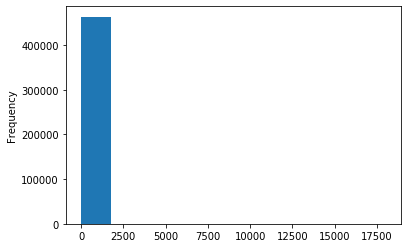

In [80]:
Rx1['TOTAL_DRUG_PACKAGE_QTY']=pd.to_numeric(Rx1.TOTAL_DRUG_PACKAGE_QTY)
Rx1.TOTAL_DRUG_PACKAGE_QTY.plot.hist()

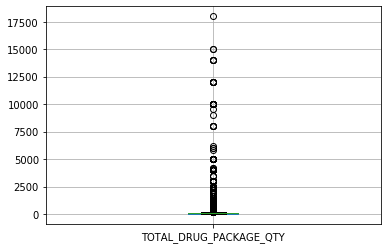

In [81]:
Rx1.boxplot(column='TOTAL_DRUG_PACKAGE_QTY')

In [82]:
Rx1.TOTAL_DRUG_PACKAGE_QTY.describe()

count    463902.000000
mean         74.906556
std         165.934746
min           0.050000
25%          28.000000
50%          53.000000
75%         100.000000
max       18000.000000
Name: TOTAL_DRUG_PACKAGE_QTY, dtype: float64

In [83]:
temp=Rx1.TOTAL_DRUG_PACKAGE_QTY.describe()
CF_QTY = temp[1]+(4*temp[2])
print(CF_QTY)

738.645538589016


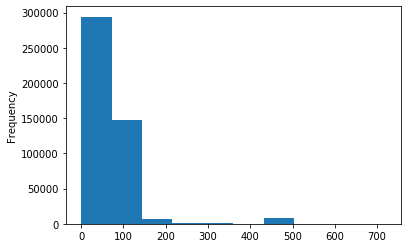

In [84]:
Rx1=Rx1[Rx1['TOTAL_DRUG_PACKAGE_QTY']<=CF_QTY]
Rx1.TOTAL_DRUG_PACKAGE_QTY.plot.hist()

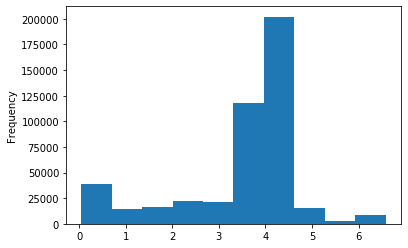

In [85]:
Rx1['LOG_TDPQ']=np.log(Rx1['TOTAL_DRUG_PACKAGE_QTY']+1)
Rx1.LOG_TDPQ.plot.hist()

In [86]:
Rx1.drop(['TOTAL_DRUG_PACKAGE_QTY'],axis=1,inplace=True)
print('\nUNIQUE:\n\n', Rx1.nunique())
print('\nMISSING:\n\n', Rx1.isna().mean()*100)


UNIQUE:

 PRIOR_AUTH_NUM            448190
PRIOR_AUTH_TYPE               22
STATUS                         2
AUTO_DENIED_FLAG               2
DRUG_LABEL_NAME             6478
CARRIER_ID                   414
ACCOUNT_ID                  3215
EMPLOYER_GROUP_ID          41063
GENDER_CODE                    2
STATE_CODE                    56
DIRECTIONS_FOR_USE        136961
DIAGNOSIS_COMMENTS         76983
PLAN_CODE                  19009
BRAND_NAME                  3561
HIGH_PRIORITY_FLAG             2
FORMULARY_STATUS               2
ICD_CODE                   44490
ICD_DESCRIPTION            76993
DRUG_STATUS_CODE               2
DRUG_STRENGTH                303
DRUG_MANUFACTURER_NAME       635
Age                           89
DRUG_UOM                     144
LOG_TDPQ                     274
dtype: int64

MISSING:

 PRIOR_AUTH_NUM            0.0
PRIOR_AUTH_TYPE           0.0
STATUS                    0.0
AUTO_DENIED_FLAG          0.0
DRUG_LABEL_NAME           0.0
CARRIER_ID            

count    4.582290e+05
mean     4.860457e+02
std      5.979537e+04
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+01
75%      5.000000e+01
max      2.000000e+07
Name: DRUG_STRENGTH, dtype: float64
cuttoff value: 179872.16319906604


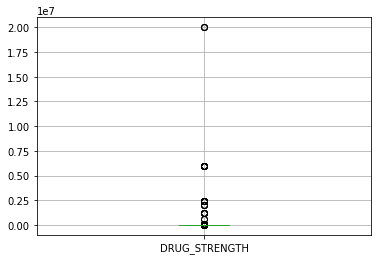

In [87]:
Rx1.boxplot(column='DRUG_STRENGTH')
temp=Rx1['DRUG_STRENGTH'].describe()
print(temp)
DRG_STGT = temp[1]+(3*temp[2])
print("cuttoff value:" ,DRG_STGT)

1. Drug stregth is highly skewed. SD are very high compared to mean. there are only 2520 records with drug strength greater than 1000 among them there are only 74 auto denied records. so safe too remove outliers.
2. Almost half of the dataset have DRUG_STRENGTH values less than 30.

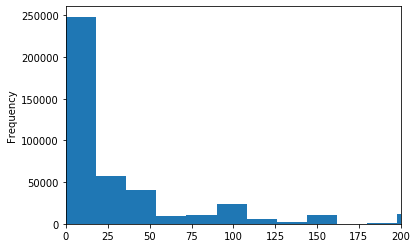

In [88]:
Rx1.loc[Rx1['DRUG_STRENGTH']<1000,'DRUG_STRENGTH'].plot.hist(bins=50,xlim=(0,200))

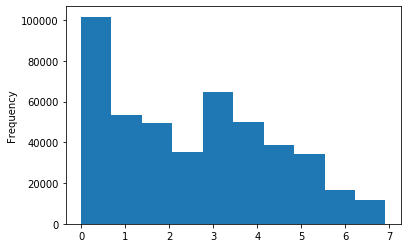

In [89]:
Rx1=Rx1[Rx1['DRUG_STRENGTH']<=1000]
Rx1['LOG_DRG_STRNGT']=np.log(Rx1['DRUG_STRENGTH']+1)
Rx1.drop(['DRUG_STRENGTH'],axis=1,inplace=True)
Rx1.LOG_DRG_STRNGT.plot.hist()

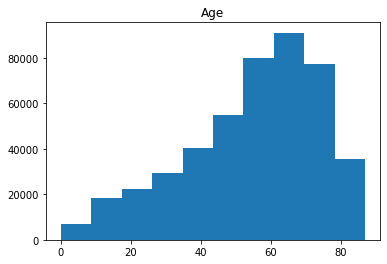

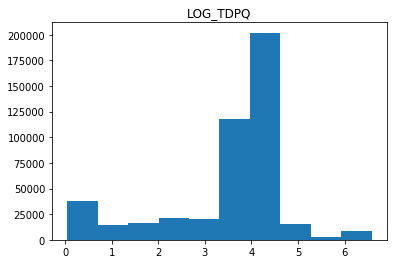

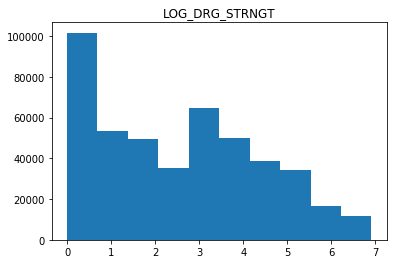

In [90]:
for column in Rx1.describe().columns:
    plt.hist(Rx1[column])
    plt.title(column)
    plt.show()

In [91]:
Rx1['NO_OF_ICD']=Rx1['ICD_CODE'].str.count('\|')+1
print('\nUNIQUE:\n\n', Rx1.nunique())
print('\nMISSING:\n\n', Rx1.isna().mean()*100)


UNIQUE:

 PRIOR_AUTH_NUM            446361
PRIOR_AUTH_TYPE               22
STATUS                         2
AUTO_DENIED_FLAG               2
DRUG_LABEL_NAME             6375
CARRIER_ID                   414
ACCOUNT_ID                  3213
EMPLOYER_GROUP_ID          41010
GENDER_CODE                    2
STATE_CODE                    56
DIRECTIONS_FOR_USE        135934
DIAGNOSIS_COMMENTS         76603
PLAN_CODE                  19002
BRAND_NAME                  3507
HIGH_PRIORITY_FLAG             2
FORMULARY_STATUS               2
ICD_CODE                   44278
ICD_DESCRIPTION            76613
DRUG_STATUS_CODE               2
DRUG_MANUFACTURER_NAME       630
Age                           89
DRUG_UOM                     129
LOG_TDPQ                     271
LOG_DRG_STRNGT               265
NO_OF_ICD                     26
dtype: int64

MISSING:

 PRIOR_AUTH_NUM            0.0
PRIOR_AUTH_TYPE           0.0
STATUS                    0.0
AUTO_DENIED_FLAG          0.0
DRUG_LABEL_NAME    

In [92]:
Rx1.head(10)

,PRIOR_AUTH_NUM,PRIOR_AUTH_TYPE,STATUS,AUTO_DENIED_FLAG,DRUG_LABEL_NAME,CARRIER_ID,ACCOUNT_ID,EMPLOYER_GROUP_ID,GENDER_CODE,STATE_CODE,...,FORMULARY_STATUS,ICD_CODE,ICD_DESCRIPTION,DRUG_STATUS_CODE,DRUG_MANUFACTURER_NAME,Age,DRUG_UOM,LOG_TDPQ,LOG_DRG_STRNGT,NO_OF_ICD
0,PA-32690944,ConcurrentReview,RESOLVED-APPROVED,N,ONFI TAB 10MG,UHCACIS01,A,71300000000000,F,NC,...,Y,G40.909,G40.909-EPILEPSY UNS NOT INTRACT W/O STATUS EP...,A,LUNDBECK,40.0,MG,4.615121,2.397895,1
1,PA-32701214,Nonformularyexception,RESOLVED-DENIED,N,JANUVIA TAB 100MG,PDPIND,P4L03200000000,IS0522051X,M,ID,...,N,0,000-TYPE 2 DIABETES MELLITUS,A,MERCKSHARP,39.0,MG,0.693147,4.615121,1
3,PA-32689323,PAReqd,RESOLVED-APPROVED,N,ENTRESTO TAB 97-103MG,PDPIND,P4L01000000000,IS0522051X,F,NC,...,Y,I50.22,I50.22-CHRONIC SYSTOLIC CONGESTIVE HEART FAILURE,A,NOVARTIS,51.0,NA,4.110874,0.000000,1
4,PA-32681836,PAReqd,RESOLVED-APPROVED,N,MOVANTIK TAB 25MG,UHCACIS01,A,73000000000000,F,FL,...,Y,000|M47.812|000|M54.2|M79.7|M32.9|Q87.40|Z79.8...,000-OPIOID INDUCED CONSTIPATION IN PATIENTS BE...,A,ASTZEN,47.0,MG,3.433987,3.258097,9
5,PA-32709148,PAReqd,RESOLVED-APPROVED,N,OXYCONTIN TAB 10MG CR,ACUTXEC,ACUTXECTR,ACUTXECTRFULLC,F,TX,...,Y,M54.16|G89.4,M54.16-RADICULOPATHY LUMBAR REGION|G89.4-CHRON...,A,PURDUE,63.0,MG,4.615121,2.397895,2
6,PA-32681213,PAReqd,RESOLVED-APPROVED,N,IBRANCE CAP 125MG,PDPIND,P0200100000000,IS5805002A,F,NY,...,Y,C50.512|C22.9,C50.512-MALIG NEOPLASM LOWER-OUTER QUAD LT FEM...,A,PFIZER US,69.0,MG,3.091042,4.836282,2
7,PA-32699050,PAReqd,RESOLVED-APPROVED,N,AMPHET/DEXTR TAB 20MG,UHCPRIM01,F,09R820000010001,M,IL,...,Y,xxxx,xxxx-xxxx,A,TEVA USA,49.0,NA,4.615121,0.000000,1
8,PA-32706339,QntyLimit,RESOLVED-APPROVED,N,SYMBICORT AER 80-4.5,PDPIND,P0338300000000,IS5921003W,M,FL,...,Y,J44.9,J44.9-CHRONIC OBSTRUCTIVE PULMONARY DISEASE UNS,A,ASTZEN LP,69.0,NA,2.415914,0.000000,1
9,PA-32690089,PAReqd,RESOLVED-DENIED,N,TRETINOIN CRE 0.1%,MPDOVA,M43008VRG99979,IR7444021CPM,F,GA,...,Y,L57.0,L57.0-ACTINIC KERATOSIS,I,ROUSES PNT,67.0,%,3.828641,0.095310,1
10,PA-32721325,Other,RESOLVED-APPROVED,N,BENAZEPRIL TAB 10MG,PDPIND,P0100200000000,IS5820001A,M,MA,...,Y,0,NOT PROVIDED,A,TEVA USA,71.0,MG,4.615121,2.397895,1


99.22500662808864


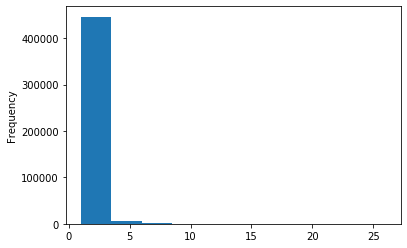

In [93]:
Rx1['NO_OF_ICD']=pd.to_numeric(Rx1['NO_OF_ICD'])
Rx1.NO_OF_ICD.plot.hist()
print(sum(Rx1['NO_OF_ICD']<=5)*100/len(Rx1))

Since 99.22% of the observation have less than 5 ICD codes we are going to split the ICD codes into 5 different features.

In [98]:
Rx1['NO_OF_ICD'].describe()

count    456391.000000
mean          1.258379
std           0.952087
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          26.000000
Name: NO_OF_ICD, dtype: float64

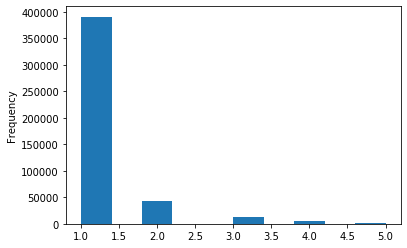

In [99]:
Rx1.loc[Rx1['NO_OF_ICD']<=5,'NO_OF_ICD'].plot.hist()

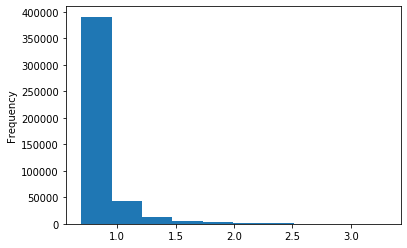

In [100]:
Rx1['LOG_NO_ICD']=np.log(Rx1['NO_OF_ICD']+1)
Rx1.drop(['NO_OF_ICD'],axis=1,inplace=True)
Rx1.LOG_NO_ICD.plot.hist()

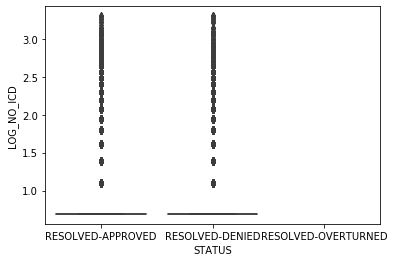

In [101]:
sns.boxplot(x='STATUS',y='LOG_NO_ICD',data=Rx1)

In [102]:
ICD_df=Rx1.ICD_CODE.str.split('\|',expand=True).iloc[:,0:5]
ICD_df['PRIOR_AUTH_NUM']=Rx1['PRIOR_AUTH_NUM']
ICD_df.head()

,0,1,2,3,4,PRIOR_AUTH_NUM
0,G40.909,None,None,None,None,PA-32690944
1,0,None,None,None,None,PA-32701214
3,I50.22,None,None,None,None,PA-32689323
4,000,M47.812,000,M54.2,M79.7,PA-32681836
5,M54.16,G89.4,None,None,None,PA-32709148


In [103]:
ICD_df.columns=['ICD1','ICD2','ICD3','ICD4','ICD5','PRIOR_AUTH_NUM']
ICD_df.replace(np.nan,'', inplace=True)
ICD_df.head()

,ICD1,ICD2,ICD3,ICD4,ICD5,PRIOR_AUTH_NUM
0,G40.909,,,,,PA-32690944
1,0,,,,,PA-32701214
3,I50.22,,,,,PA-32689323
4,000,M47.812,000,M54.2,M79.7,PA-32681836
5,M54.16,G89.4,,,,PA-32709148


In [104]:
ICD_df.describe()

,ICD1,ICD2,ICD3,ICD4,ICD5,PRIOR_AUTH_NUM
count,456391,456391,456391,456391,456391,456391
unique,9002,5320,3083,1888,1251,446361
top,0,,,,,PA-32740656
freq,126938,391011,434025,446078,450800,3


comorb_df = icd.icd_to_comorbidities(ICD_df, "PRIOR_AUTH_NUM", ["ICD1","ICD2","ICD3","ICD4","ICD5"]
                                     , mapping='charlson10')

comorb_df.describe()

comorb_df[:] = (comorb_df[:] == 'TRUE').astype(int)
comorb_df.describe()
print('\nUNIQUE:\n\n', comorb_df.nunique())
print('\nMISSING:\n\n', comorb_df.isna().mean()*100)

Since there is no package defind to process ICD10 codes in python getting comorbidity values from R script.

In [109]:
comorb_r=pd.read_excel("Comorbidity.xlsx", sheet_name='Comorbidity',dtype=str)
print('\nUNIQUE:\n\n', comorb_r.nunique())
print('\nMISSING:\n\n', comorb_r.isna().mean()*100)


UNIQUE:

 PRIOR_AUTH_NUM    502813
CHF                    2
Valvular               2
PHTN                   2
PVD                    2
HTN                    2
HTNcx                  2
Paralysis              2
NeuroOther             2
Pulmonary              2
DM                     2
DMcx                   2
Hypothyroid            2
Renal                  2
Liver                  2
PUD                    2
HIV                    2
Lymphoma               2
Mets                   2
Tumor                  2
Rheumatic              2
Coagulopathy           2
Obesity                2
WeightLoss             2
FluidsLytes            2
BloodLoss              2
Anemia                 2
Alcohol                2
Drugs                  2
Psychoses              2
Depression             2
dtype: int64

MISSING:

 PRIOR_AUTH_NUM    0.0
CHF               0.0
Valvular          0.0
PHTN              0.0
PVD               0.0
HTN               0.0
HTNcx             0.0
Paralysis         0.0
NeuroOther   

In [110]:
#comorb_r.columns
cols=[ 'CHF', 'Valvular', 'PHTN', 'PVD', 'HTN', 'HTNcx',
       'Paralysis', 'NeuroOther', 'Pulmonary', 'DM', 'DMcx', 'Hypothyroid',
       'Renal', 'Liver', 'PUD', 'HIV', 'Lymphoma', 'Mets', 'Tumor',
       'Rheumatic', 'Coagulopathy', 'Obesity', 'WeightLoss', 'FluidsLytes',
       'BloodLoss', 'Anemia', 'Alcohol', 'Drugs', 'Psychoses', 'Depression']
comorb_r[cols]=comorb_r[cols].astype('uint8')

In [111]:
Rx1=pd.merge(Rx1,comorb_r, how='left',on='PRIOR_AUTH_NUM')
Rx1.head()

,PRIOR_AUTH_NUM,PRIOR_AUTH_TYPE,STATUS,AUTO_DENIED_FLAG,DRUG_LABEL_NAME,CARRIER_ID,ACCOUNT_ID,EMPLOYER_GROUP_ID,GENDER_CODE,STATE_CODE,...,Coagulopathy,Obesity,WeightLoss,FluidsLytes,BloodLoss,Anemia,Alcohol,Drugs,Psychoses,Depression
0,PA-32690944,ConcurrentReview,RESOLVED-APPROVED,N,ONFI TAB 10MG,UHCACIS01,A,71300000000000,F,NC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PA-32701214,Nonformularyexception,RESOLVED-DENIED,N,JANUVIA TAB 100MG,PDPIND,P4L03200000000,IS0522051X,M,ID,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PA-32689323,PAReqd,RESOLVED-APPROVED,N,ENTRESTO TAB 97-103MG,PDPIND,P4L01000000000,IS0522051X,F,NC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PA-32681836,PAReqd,RESOLVED-APPROVED,N,MOVANTIK TAB 25MG,UHCACIS01,A,73000000000000,F,FL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PA-32709148,PAReqd,RESOLVED-APPROVED,N,OXYCONTIN TAB 10MG CR,ACUTXEC,ACUTXECTR,ACUTXECTRFULLC,F,TX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
Rx1[cols].sample(10)

,CHF,Valvular,PHTN,PVD,HTN,HTNcx,Paralysis,NeuroOther,Pulmonary,DM,...,Coagulopathy,Obesity,WeightLoss,FluidsLytes,BloodLoss,Anemia,Alcohol,Drugs,Psychoses,Depression
344901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since we have the comorbidity values we can drop the ICD_CODE column which doenst make much sense to the machine

In [48]:
Rx1.drop(['ICD_CODE'],axis=1,inplace=True)

In [114]:
print('\nUNIQUE:\n\n', Rx1.nunique())
print('\nMISSING:\n\n', Rx1.isna().sum())
print('\nDTYPES:\n\n', Rx1.dtypes)


UNIQUE:

 PRIOR_AUTH_NUM            446361
PRIOR_AUTH_TYPE               22
STATUS                         2
AUTO_DENIED_FLAG               2
DRUG_LABEL_NAME             6375
CARRIER_ID                   414
ACCOUNT_ID                  3213
EMPLOYER_GROUP_ID          41010
GENDER_CODE                    2
STATE_CODE                    56
DIRECTIONS_FOR_USE        135934
DIAGNOSIS_COMMENTS         76603
PLAN_CODE                  19002
BRAND_NAME                  3507
HIGH_PRIORITY_FLAG             2
FORMULARY_STATUS               2
ICD_CODE                   44278
ICD_DESCRIPTION            76613
DRUG_STATUS_CODE               2
DRUG_MANUFACTURER_NAME       630
Age                           89
DRUG_UOM                     129
LOG_TDPQ                     271
LOG_DRG_STRNGT               265
LOG_NO_ICD                    26
CHF                            2
Valvular                       2
PHTN                           2
PVD                            2
HTN                            2

In [115]:
Rx1['CHF'].fillna(0,inplace=True)
Rx1['Valvular'].fillna(0,inplace=True)
Rx1['PHTN'].fillna(0,inplace=True)
Rx1['PVD'].fillna(0,inplace=True)
Rx1['HTN'].fillna(0,inplace=True)
Rx1['HTNcx'].fillna(0,inplace=True)
Rx1['Paralysis'].fillna(0,inplace=True)
Rx1['NeuroOther'].fillna(0,inplace=True)
Rx1['Pulmonary'].fillna(0,inplace=True)
Rx1['DM'].fillna(0,inplace=True)
Rx1['DMcx'].fillna(0,inplace=True)
Rx1['Hypothyroid'].fillna(0,inplace=True)
Rx1['Renal'].fillna(0,inplace=True)
Rx1['Liver'].fillna(0,inplace=True)
Rx1['PUD'].fillna(0,inplace=True)
Rx1['HIV'].fillna(0,inplace=True)
Rx1['Lymphoma'].fillna(0,inplace=True)
Rx1['Mets'].fillna(0,inplace=True)
Rx1['Tumor'].fillna(0,inplace=True)
Rx1['Rheumatic'].fillna(0,inplace=True)
Rx1['Coagulopathy'].fillna(0,inplace=True)
Rx1['Obesity'].fillna(0,inplace=True)
Rx1['WeightLoss'].fillna(0,inplace=True)
Rx1['FluidsLytes'].fillna(0,inplace=True)
Rx1['BloodLoss'].fillna(0,inplace=True)
Rx1['Anemia'].fillna(0,inplace=True)
Rx1['Alcohol'].fillna(0,inplace=True)
Rx1['Drugs'].fillna(0,inplace=True)
Rx1['Psychoses'].fillna(0,inplace=True)
Rx1['Depression'].fillna(0,inplace=True)

In [116]:
print('\nUNIQUE:\n\n', Rx1.nunique())
print('\nMISSING:\n\n', Rx1.isna().sum())
print('\nDTYPES:\n\n', Rx1.dtypes)


UNIQUE:

 PRIOR_AUTH_NUM            446361
PRIOR_AUTH_TYPE               22
STATUS                         2
AUTO_DENIED_FLAG               2
DRUG_LABEL_NAME             6375
CARRIER_ID                   414
ACCOUNT_ID                  3213
EMPLOYER_GROUP_ID          41010
GENDER_CODE                    2
STATE_CODE                    56
DIRECTIONS_FOR_USE        135934
DIAGNOSIS_COMMENTS         76603
PLAN_CODE                  19002
BRAND_NAME                  3507
HIGH_PRIORITY_FLAG             2
FORMULARY_STATUS               2
ICD_CODE                   44278
ICD_DESCRIPTION            76613
DRUG_STATUS_CODE               2
DRUG_MANUFACTURER_NAME       630
Age                           89
DRUG_UOM                     129
LOG_TDPQ                     271
LOG_DRG_STRNGT               265
LOG_NO_ICD                    26
CHF                            2
Valvular                       2
PHTN                           2
PVD                            2
HTN                            2

the distribution doesnt vary much because of the total_drug_package_quantity

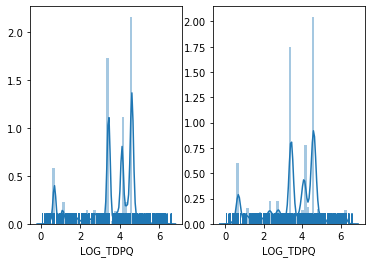

In [117]:
plt.subplot(1,2,1)
sns.distplot(Rx1[Rx1['STATUS']=='RESOLVED-APPROVED']['LOG_TDPQ'],rug=True)

plt.subplot(1,2,2)
sns.distplot(Rx1[Rx1['STATUS']=='RESOLVED-DENIED']['LOG_TDPQ'],rug=True)

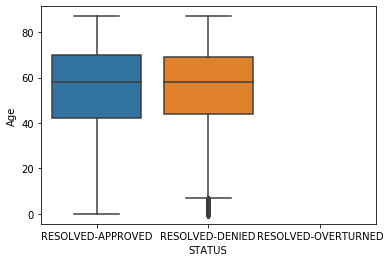

In [118]:
sns.boxplot(x='STATUS',y='Age',data=Rx1)

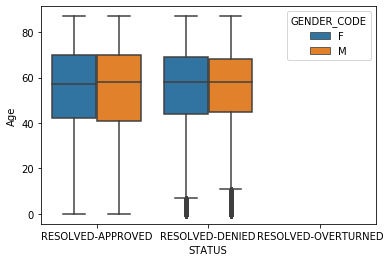

In [119]:
sns.boxplot(x='STATUS',y='Age',data=Rx1,hue='GENDER_CODE')

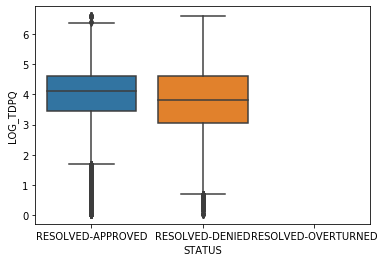

In [120]:
sns.boxplot(x='STATUS',y='LOG_TDPQ',data=Rx1)

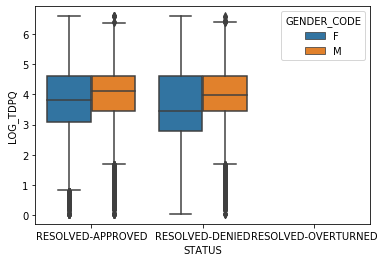

In [121]:
sns.boxplot(x='STATUS',y='LOG_TDPQ',data=Rx1,hue='GENDER_CODE')

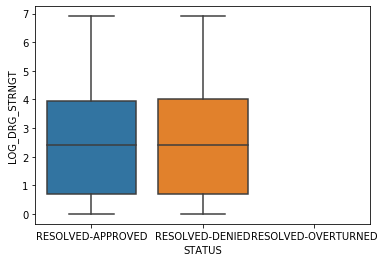

In [122]:
sns.boxplot(x='STATUS',y='LOG_DRG_STRNGT',data=Rx1)

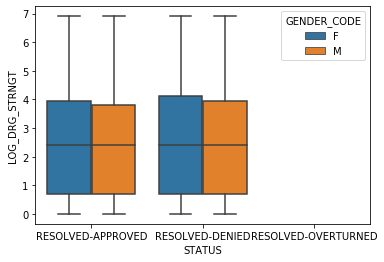

In [123]:
sns.boxplot(x='STATUS',y='LOG_DRG_STRNGT',data=Rx1,hue='GENDER_CODE')

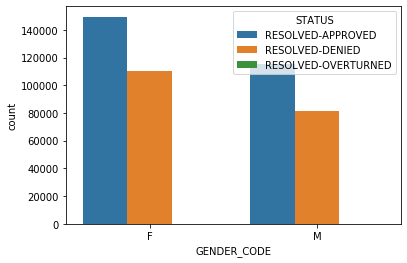

In [128]:
sns.countplot(data=Rx1, x='GENDER_CODE', hue='STATUS')

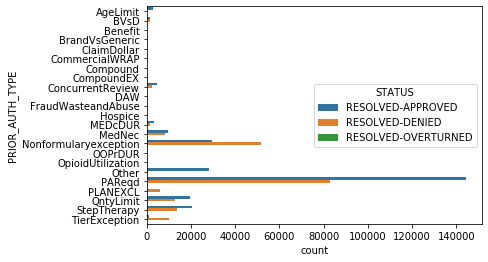

In [135]:
sns.countplot(data=Rx1, y='PRIOR_AUTH_TYPE', hue='STATUS')

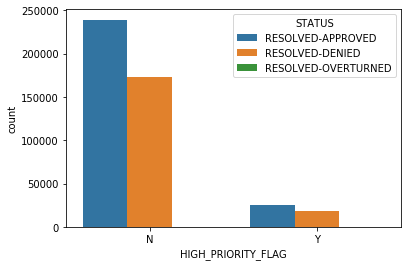

In [155]:
sns.countplot(data=Rx1, x='HIGH_PRIORITY_FLAG', hue='STATUS')

In [157]:
print(Rx1.groupby(['HIGH_PRIORITY_FLAG','STATUS']).size())

HIGH_PRIORITY_FLAG  STATUS           
N                   RESOLVED-APPROVED    239188
                    RESOLVED-DENIED      172898
Y                   RESOLVED-APPROVED     25571
                    RESOLVED-DENIED       18734
dtype: int64


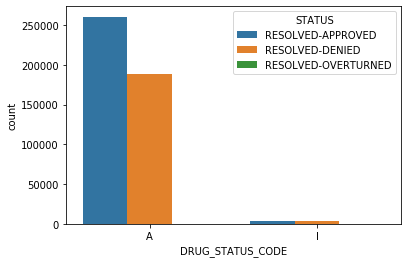

In [131]:
sns.countplot(data=Rx1, x='DRUG_STATUS_CODE', hue='STATUS')

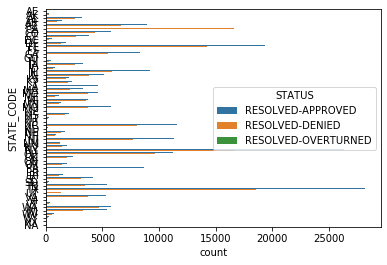

In [136]:
sns.countplot(data=Rx1, y='STATE_CODE', hue='STATUS')

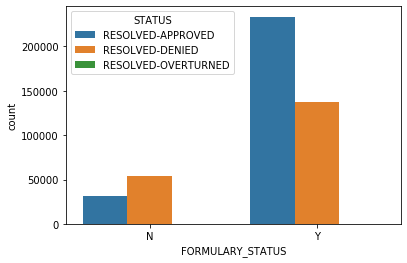

In [133]:
sns.countplot(data=Rx1, x='FORMULARY_STATUS', hue='STATUS')

In [144]:
Rx1['LOG_AGE']=np.log(Rx1['Age']+1)

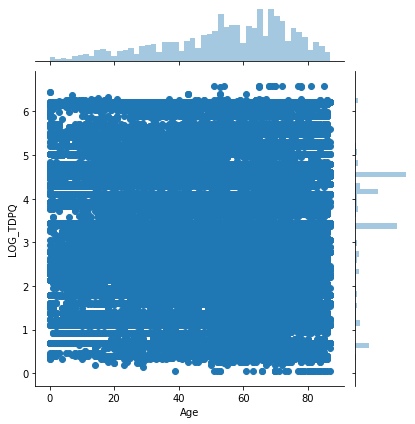

In [149]:
sns.jointplot('Age','LOG_TDPQ',Rx1)
plt.show()

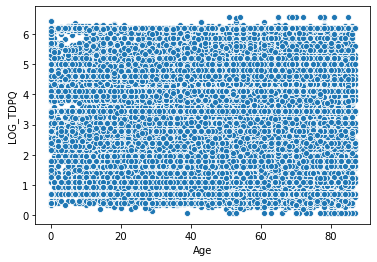

In [150]:
sns.scatterplot(x='Age',y='LOG_TDPQ',data=Rx1)
plt.show()

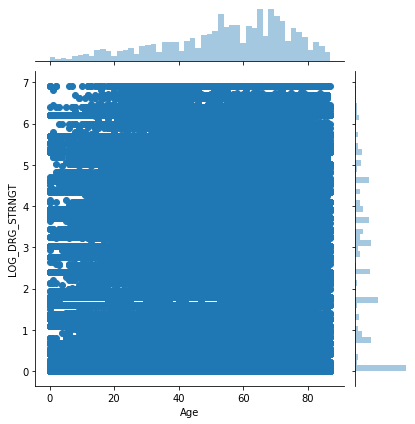

In [151]:
sns.jointplot('Age','LOG_DRG_STRNGT',Rx1)
plt.show()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidfvect
from sklearn.feature_extraction.text import CountVectorizer as countvect
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
import re
import scipy as scipy

In [47]:
tfidf = tfidfvect(stop_words = 'english', lowercase = True,use_idf=True,max_features=500)
tf = countvect(stop_words = 'english', lowercase=True,max_features=500)

In [48]:
tfidf1 = tfidfvect(stop_words = 'english', lowercase = True,use_idf=True,max_features=300)
tfidf2 = tfidfvect(stop_words = 'english', lowercase = True,use_idf=True,max_features=300)
tfidf3 = tfidfvect(stop_words = 'english', lowercase = True,use_idf=True,max_features=300)

In [49]:
def preprocess(x):
    reg = re.compile(r"\W")
    x = re.sub(reg, " ", x)
    #x = ' '.join(e for e in x if e.isalnum())
    return x

In [50]:
Rx1["DIRECTIONS_FOR_USE"] = Rx1.DIRECTIONS_FOR_USE.apply(lambda x: preprocess(x))
Rx1["DIAGNOSIS_COMMENTS"] = Rx1.DIAGNOSIS_COMMENTS.apply(lambda x: preprocess(x))
Rx1["ICD_DESCRIPTION"] = Rx1.ICD_DESCRIPTION.apply(lambda x: preprocess(x))

In [51]:
dfu_df=pd.DataFrame(tfidf1.fit_transform(Rx1["DIRECTIONS_FOR_USE"]).todense(),columns=tfidf1.get_feature_names())

In [52]:
#dcm_df=pd.DataFrame(tfidf2.fit_transform(Rx1["DIAGNOSIS_COMMENTS"]).todense(),columns=tfidf2.get_feature_names())

In [53]:
#icddesc_df=pd.DataFrame(tfidf3.fit_transform(Rx1["ICD_DESCRIPTION"]).todense(),columns=tfidf3.get_feature_names())

In [54]:
print("Direction of Use : ",type(dfu_df))
print(dfu_df.shape,"\n")

#print("Diag Comments : ",type(dcm_df))
#print(dcm_df.shape,"\n")

#print("ICD Description",type(icddesc_df))
#print(icddesc_df.shape)

Direction of Use :  <class 'pandas.core.frame.DataFrame'>
(489007, 300) 



In [55]:
print(dfu_df.shape)
print(Rx1.shape)
print(Rx1.dtypes)

(489007, 300)
(489007, 54)
PRIOR_AUTH_NUM              object
PRIOR_AUTH_TYPE           category
STATUS                    category
AUTO_DENIED_FLAG          category
DRUG_LABEL_NAME           category
CARRIER_ID                category
ACCOUNT_ID                category
EMPLOYER_GROUP_ID         category
GENDER_CODE               category
STATE_CODE                category
DIRECTIONS_FOR_USE          object
DIAGNOSIS_COMMENTS          object
PLAN_CODE                 category
BRAND_NAME                category
HIGH_PRIORITY_FLAG        category
FORMULARY_STATUS          category
ICD_DESCRIPTION             object
DRUG_STATUS_CODE          category
DRUG_MANUFACTURER_NAME    category
Age                        float64
DRUG_UOM                  category
LOG_TDPQ                   float64
LOG_DRG_STRNGT             float64
NO_OF_ICD                    int64
CHF                        float64
Valvular                   float64
PHTN                       float64
PVD                        f

#Adding Direction of use and Diagnosis comments to final dataset and excluding icd description as we already have comorbidity matrix

In [56]:
#Rx1=pd.concat([Rx1,dfu_df,dcm_df], axis=1)
Rx1=pd.concat([Rx1,dfu_df], axis=1)

In [57]:
print(Rx1.dtypes)

PRIOR_AUTH_NUM              object
PRIOR_AUTH_TYPE           category
STATUS                    category
AUTO_DENIED_FLAG          category
DRUG_LABEL_NAME           category
CARRIER_ID                category
ACCOUNT_ID                category
EMPLOYER_GROUP_ID         category
GENDER_CODE               category
STATE_CODE                category
DIRECTIONS_FOR_USE          object
DIAGNOSIS_COMMENTS          object
PLAN_CODE                 category
BRAND_NAME                category
HIGH_PRIORITY_FLAG        category
FORMULARY_STATUS          category
ICD_DESCRIPTION             object
DRUG_STATUS_CODE          category
DRUG_MANUFACTURER_NAME    category
Age                        float64
DRUG_UOM                  category
LOG_TDPQ                   float64
LOG_DRG_STRNGT             float64
NO_OF_ICD                    int64
CHF                        float64
Valvular                   float64
PHTN                       float64
PVD                        float64
HTN                 

In [58]:
Rx1.drop(['DIRECTIONS_FOR_USE','DIAGNOSIS_COMMENTS','ICD_DESCRIPTION','PRIOR_AUTH_NUM','CARRIER_ID','ACCOUNT_ID','EMPLOYER_GROUP_ID','PLAN_CODE'],axis=1,inplace=True)

In [125]:
#Rx1.head()

Rx1.to_csv('C:\\Users\\pdubhasi\\Documents\\UHG\\Rx prior Auth\\To_EDA_Rx_Fianl.csv')

In [60]:
Rx2=pd.get_dummies(Rx1,columns=['PRIOR_AUTH_TYPE','STATUS','GENDER_CODE','STATE_CODE',
                                'DRUG_LABEL_NAME','BRAND_NAME','HIGH_PRIORITY_FLAG',
                                'FORMULARY_STATUS','DRUG_STATUS_CODE','DRUG_MANUFACTURER_NAME','DRUG_UOM'])

In [65]:
print(Rx2.head())
print(Rx2.dtypes)
print(Rx2.shape)

  AUTO_DENIED_FLAG   Age  LOG_TDPQ  LOG_DRG_STRNGT  NO_OF_ICD  CHF  Valvular  \
0                N  73.0  4.615121        2.397895          1  0.0       0.0   
1                N  68.0  4.510860        3.433987          2  0.0       0.0   
2                N  73.0  2.397895        2.397895          1  0.0       0.0   
3                N  69.0  0.693147        2.240710          2  0.0       0.0   
4                N  49.0  4.615121        1.386294          2  0.0       0.0   

   PHTN  PVD  HTN  ...  DRUG_UOM_UNIT/4ML  DRUG_UOM_UNIT/ACT  \
0   0.0  0.0  0.0  ...                  0                  0   
1   0.0  0.0  0.0  ...                  0                  0   
2   0.0  0.0  0.0  ...                  0                  0   
3   0.0  0.0  0.0  ...                  0                  0   
4   0.0  0.0  0.0  ...                  0                  0   

   DRUG_UOM_UNIT/GM  DRUG_UOM_UNIT/ML  DRUG_UOM_UNT/0.36ML  \
0                 0                 0                    0   
1         

In [66]:
Rx2.to_csv('C:\\Users\\pdubhasi\\Documents\\UHG\\Rx prior Auth\\Model_ready_Rx_PA.csv')

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score,log_loss
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns

In [63]:
data_train, data_test, class_train, class_test = train_test_split(Rx2, Rx2['AUTO_DENIED_FLAG'], test_size=0.3, random_state=10)

In [64]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(data_train, class_train)

MemoryError: 

In [ ]:
y_test_pred = rf.predict(data_test)

tr_acc = accuracy_score(rf.predict(data_train), class_train)
te_acc = accuracy_score(y_test_pred, class_test)

print('Train Accuracy: \t{:.3f} %\nValidation Accuracy: \t{:.3f} %'.format(tr_acc*100, te_acc*100))

In [ ]:
#Confusion Matrix

data = {'y_predicted': y_test_pred.tolist(),
        'y_actual':    class_test
        }

df = pd.DataFrame(data, columns=['y_actual','y_predicted'])
confusion_matrix_df = pd.crosstab(df['y_actual'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix_df, annot=True,fmt='.4g')
plt.show()

In [ ]:
# Precision, recall and f1 score

print(classification_report(class_test,y_test_pred))

In [ ]:
#ROC Curve

y_test_pred_prob = rf.predict_proba(data_test)[:, 1]
fpr, tpr, _ = roc_curve(class_test, y_test_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.fill_between(fpr,tpr,alpha=0.3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#plt.title('ROC curve :: AUC={}'.format(round(roc_auc_score(y_test,lg.predict_proba(X_test)[:,1]),2)))
#plt.legend(loc='best')
plt.show()

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
XGB = XGBClassifier()
XGB.fit(data_train, class_train)
print(XGB)

In [ ]:
# make predictions for test data
y_pred_xgb = XGB.predict(data_test)
xgb_predictions = [round(value) for value in y_pred_xgb]

In [ ]:
#evaluate predictions
xgb_accuracy = accuracy_score(class_test, xgb_predictions)
print("Accuracy: %.2f%%" % (xgb_accuracy * 100.0))

In [ ]:
#Confusion Matrix for XGBoost

xgb_data = {'y_predicted': xgb_predictions.tolist(),
        'y_actual':    class_test
        }

xgb_df = pd.DataFrame(xgb_data, columns=['y_actual','y_predicted'])
xgb_confusion_matrix_df = pd.crosstab(xgb_df['y_actual'], xgb_df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(xgb_confusion_matrix_df, annot=True,fmt='.4g')
plt.show()

In [ ]:
# Precision, recall and f1 score for XGB

print(classification_report(class_test,y_pred_xgb))

In [ ]:
#ROC Curve

xgb_y_pred_prob = XGB.predict_proba(data_test)[:, 1]
fpr, tpr, _ = roc_curve(class_test, xgb_y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='XGBoost')
plt.fill_between(fpr,tpr,alpha=0.3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#plt.title('ROC curve :: AUC={}'.format(round(roc_auc_score(y_test,lg.predict_proba(X_test)[:,1]),2)))
#plt.legend(loc='best')
plt.show()